In [5]:
import os
import numpy as np
import json
import pandas as pd
# tasks = [
#     "agieval", "boolq", "hellaswag", "mathqa", "mrpc", "piqa", "qnli", "rte", "social_iqa", "winogrande",
#     "arc_challenge", "copa", "lambada_standard",  "multirc", "pubmedqa", "qqp", "sciq", "sst2", "wnli",
#     "arc_easy", "gsm8k", "logiqa", "mnli", "openbookqa", "qasper", "race", "scrolls", "wikitext", "wsc"
# ]
all_tasks = {'group1': ['wikitext', 'lambada_standard'],
'group2': ['triviaqa', 'nq_open', 'webqs', 'hellaswag', 'squadv2'],
'group3': ['squadv2'],
         'regular': [('piqa', 0), ('copa', 0), ('openbookqa', 10),
                 ('lambada_openai', 0), ('hellaswag', 0), ('winograd', 3), ('winogrande', 5),
                 ('squadv2', 3), ('boolq',0), ('coqa',0),
                 ('qa_wikidata', 3), ('arc_easy', 3), ('arc_challenge', 3), ("quality", 0)]
         }


In [2]:
step_to_versions = {('1b', 'iter-600000-ckpt-step-75000_hf'):  ['cc_merged_v2_8k', 'cc_merged_v1_8k', 'intramask_cc_8k', 'intramask_cc_merged_v2_8k', 'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k_intracccont','cc_8k',],
                    ('1b', 'iter-480000-ckpt-step-60000_hf'):  ['cc_merged_v2_8k', 'intramask_cc_8k', 'intramask_cc_merged_v2_8k', 'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k_intracccont','cc_8k',],
                    ('1b', 'iter-380000-ckpt-step-47500_hf'):  ['cc_merged_v2_8k', 'intramask_cc_8k', 'intramask_cc_merged_v2_8k', 'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k_intracccont','cc_8k',],
                    }

In [ ]:
all_dfs = []
nshot = 10
size='1b'
# iter_name = 'iter-160000-ckpt-step-40000_hf'
# iter_name = 'iter-480000-ckpt-step-60000_hf'
iter_name = 'iter-600000-ckpt-step-75000_hf'
# iter_name = 'iter-380000-ckpt-step-47500_hf'
for task_name in tasks:
    task_performance = {}
    # for ds_version in ['cc', 'cc_merged_v1', 'cc_merged_v2', 'cc_merged_v3', 'intramask_cc']:
    # for ds_version in ['cc_merged_v2_8k', 'intramask_cc_8k', 'intramask_cc_merged_v2_8k', 'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k_intrav2cont','cc_8k',]:
    # for ds_version in ['cc_merged_v2_8k', 'cc_merged_v1_8k', 'intramask_cc_8k', 'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k_intracccont','cc_8k',]: #
    # intramask_cc_merged_v2_8k
    # for ds_version in ['baseline']:
    for ds_version in ['BM25Chunk', "UniChunk", "MixChunk", "IntraDoc"]:

        # BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_1b_8k_{ds_version}_8k/iter-380000-ckpt-step-47500_hf"
        # BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_{size}_8k_{ds_version}/{iter_name}"
        BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/tyzhu/tiny_LLaMA_{size}_8k_{ds_version}_{iter_name}"
        BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/yuzhaouoe/{ds_version}"
    #
    #     BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/TinyLlama/TinyLlama-1.1B-step-50K-105b"
        # BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/home/aiops/zhuty/lm_indexer_data/tyzhu/flan_max_300_added_tyzhu_tiny_LLaMA_1b_8k_{ds_version}_8k_iter-380000-ckpt-step-47500_hf/checkpoint-12387"
#         result_file_path = os.path.join(BASE_PATH, f"{task_name}", f"results_{nshot}.json")
        # result_file_path = os.path.join(BASE_PATH, f"{task_name}", f"{nshot}", f"tyzhu__tiny_LLaMA_{size}_8k_{ds_version}_{iter_name}")
        # result is a file that begins with 'result', get the latest result
        # result_files = [f for f in os.listdir(result_file_path) if f.startswith('result')]
        # result_files.sort()
        # result_file_path = os.path.join(result_file_path, result_files[-1])
        result_file_path = os.path.join(BASE_PATH, f"{task_name}", f"{nshot}", f"results.json")
        if not os.path.exists(result_file_path):
            print(f"File not found", task_name, ds_version)
            continue
        result = json.load(open(result_file_path))
        # print(result)
        assert result['n-shot'][task_name] == nshot, "n-shot not match, got %d" % result['n-shot'][task_name] + " expected %d" % nshot + "in task %s" % task_name + "of model %s" % ds_version
        result = result['results'][task_name]
        task_performance[ds_version] = result
        # break
    # make the dataframe
    print("Task:", task_name)
    if len(task_performance) == 0:
        continue
    df = pd.DataFrame(task_performance)
    df = pd.concat([df.loc[['alias']], df.drop('alias')])
    all_dfs.append(df)
    print(df)

In [ ]:
new_df = pd.concat(all_dfs, axis=0)

In [ ]:
new_df

#### Compare the same model over different steps

In [21]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [22]:
def remove_underline(task_name):
    return task_name.replace("_", "")


In [41]:
all_dfs = []
# size='360M'
size = '1b'

ds_versions = ['cc_merged_v2_8k', 'cc_8k' , 'intramask_cc_8k' ,'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k_intracccont', 'cc_merged_v1_8k']

# tasks_and_shots =[('wikitext', 0), ('lambada_standard', 0), ('triviaqa',5),('nq_open',5), ('hellaswag',5), ('squadv2',5), ('quality', 0)]

all_tasks = {'group1': ['wikitext', 'lambada_standard'],
'group2': ['triviaqa', 'nq_open', 'webqs', 'hellaswag', 'squadv2'],
'group3': ['squadv2'],
         'regular': [('piqa', 0), ('copa', 0), ('openbookqa', 10),
                 ('lambada_openai', 0), ('hellaswag', 0), ('winogrande', 5),
                 ('squadv2', 3), ('boolq',0), ('coqa',0),
                 ('arc_easy', 3), ('arc_challenge', 3),]
         }
priority = "high"

tasks_and_shots = all_tasks['regular']
commands = []
for ds_version in ds_versions:
    for task_name, nshot in tasks_and_shots:
        task_performance = {}
        # for ds_version in ['cc_merged_v2_8k', 'intramask_cc_8k', 'intramask_cc_merged_v2_8k', 'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k_intrav2cont','cc_8k',]:
        # for step in range(27500, 67500 + 2500, 2500):
        for step in range(5000, 80000 , 5000):
            # BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_1b_8k_{ds_version}_8k/iter-380000-ckpt-step-47500_hf"
            # BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_{size}_8k_{ds_version}/iter-{step*4:06}-ckpt-step-{step}_hf"
            # iter_name = f"iter-{step*4:06}-ckpt-step-{step}_hf"
            if step < 50000 and 'intracccont' in ds_version:
                continue
            iter_name = f"iter-{step*8:06}-ckpt-step-{step}_hf"
            BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/tyzhu/tiny_LLaMA_{size}_8k_{ds_version}_{iter_name}"

            # BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/home/aiops/zhuty/lm_indexer_data/tyzhu/flan_max_300_added_tyzhu_tiny_LLaMA_1b_8k_{ds_version}_8k_iter-380000-ckpt-step-47500_hf/checkpoint-12387"
            # result_file_path = os.path.join(BASE_PATH, f"{task_name}", f"results_{nshot}.json")
            # result_file_path = os.path.join(BASE_PATH, f"{task_name}", f"{nshot}", f"results.json")
            result_file_path = os.path.join(BASE_PATH, f"{task_name}", f"{nshot}", f"tyzhu__tiny_LLaMA_{size}_8k_{ds_version}_{iter_name}")
            if not os.path.exists(result_file_path):
                print(f"File not found", task_name, result_file_path)
                jobname = f"har{size.lower()}{remove_underline(task_name)}{remove_underline(ds_version)}"[:40].lower() #max length 40
                model_path = f"tyzhu/tiny_LLaMA_{size}_8k_{ds_version}_{iter_name}"
                commands.append(
                f""" sailctl job create {jobname} -p {priority}  -g 1  --debug --command-line-args  ' source /home/aiops/zhuty/start.sh ; cd /home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/ ; bash eval.sh {task_name} {model_path} {nshot}' """)
                continue
            # result is a file that begins with 'result', get the latest result
            result_files = [f for f in os.listdir(result_file_path) if f.startswith('result')]
            result_files.sort()
            result_file_path = os.path.join(result_file_path, result_files[-1])



            result = json.load(open(result_file_path))
            # print(result)
            assert result['n-shot'][task_name] == nshot, "n-shot not match, got %d" % result['n-shot'][task_name] + " expected %d" % nshot + "in task %s" % task_name + "of model %s" % ds_version
            result = result['results'][task_name]
            task_performance[ds_version] = result
            # break
        # make the dataframe
            if len(task_performance) == 0:
                continue
            df = pd.DataFrame(task_performance)
            df = pd.concat([df.loc[['alias']], df.drop('alias')])
            df = df.transpose()
            df['step'] = step
            all_dfs.append(df)

File not found squadv2 /home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/tyzhu/tiny_LLaMA_1b_8k_cc_8k_iter-040000-ckpt-step-5000_hf/squadv2/3/tyzhu__tiny_LLaMA_1b_8k_cc_8k_iter-040000-ckpt-step-5000_hf
File not found squadv2 /home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/tyzhu/tiny_LLaMA_1b_8k_cc_8k_iter-080000-ckpt-step-10000_hf/squadv2/3/tyzhu__tiny_LLaMA_1b_8k_cc_8k_iter-080000-ckpt-step-10000_hf
File not found squadv2 /home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/tyzhu/tiny_LLaMA_1b_8k_cc_8k_iter-120000-ckpt-step-15000_hf/squadv2/3/tyzhu__tiny_LLaMA_1b_8k_cc_8k_iter-120000-ckpt-step-15000_hf
File not found squadv2 /home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/tyzhu/tiny_LLaMA_1b_8k_cc_8k_iter-160000-ckpt-step-20000_hf/squadv2/3/tyzhu__tiny_LLaMA_1b_8k_cc_8k_iter-160000-ckpt-step-20000_hf
File not found squadv2 /home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/tyzhu/tiny_LLaMA_1b_8k_cc_8k_iter-360000-ckpt-step-45000_hf/squadv2/3/tyzhu__tiny_L

In [42]:
concat_df = pd.concat(all_dfs, axis=0)

In [43]:
len(commands)

26

In [40]:
batch_size = 20
batches = [commands[i:i + batch_size] for i in range(0, len(commands), batch_size)]

with open("/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/scripts/run_1b_batches.sh", "w") as f:
    for batch in batches:
        for command in batch:
            f.write(f"{command} &\n")
        f.write("wait\n")
        f.write("sleep 1\n")  # Add a sleep between batches if needed


In [44]:
concat_df

,alias,"acc,none","acc_norm,none","acc_norm_stderr,none","acc_stderr,none",step,"perplexity,none","perplexity_stderr,none","HasAns_exact,none","HasAns_exact_stderr,none",...,"best_exact,none","best_exact_stderr,none","best_f1,none","best_f1_stderr,none","exact,none","exact_stderr,none","f1,none","f1_stderr,none","em,none","em_stderr,none"
cc_merged_v2_8k,piqa,0.571273,0.572361,0.011543,0.011547,5000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_merged_v2_8k,piqa,0.59086,0.591404,0.011469,0.011472,10000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_merged_v2_8k,piqa,0.599565,0.598477,0.011437,0.011432,15000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_merged_v2_8k,piqa,0.604461,0.609358,0.011383,0.011408,20000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_merged_v2_8k,piqa,0.619695,0.609902,0.011381,0.011327,25000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cc_merged_v1_8k,arc_challenge,0.230375,0.267065,0.012929,0.012305,55000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_merged_v1_8k,arc_challenge,0.253413,0.273038,0.013019,0.012711,60000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_merged_v1_8k,arc_challenge,0.25,0.267065,0.012929,0.012654,65000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_merged_v1_8k,arc_challenge,0.249147,0.273891,0.013032,0.012639,70000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
concat_df.index

Index(['cc_merged_v2_8k', 'cc_merged_v2_8k', 'cc_merged_v2_8k',
       'cc_merged_v2_8k', 'cc_merged_v2_8k', 'cc_merged_v2_8k',
       'cc_merged_v2_8k', 'cc_merged_v2_8k', 'cc_merged_v2_8k',
       'cc_merged_v2_8k',
       ...
       'cc_merged_v1_8k', 'cc_merged_v1_8k', 'cc_merged_v1_8k',
       'cc_merged_v1_8k', 'cc_merged_v1_8k', 'cc_merged_v1_8k',
       'cc_merged_v1_8k', 'cc_merged_v1_8k', 'cc_merged_v1_8k',
       'cc_merged_v1_8k'],
      dtype='object', length=865)

<Figure size 1000x600 with 0 Axes>

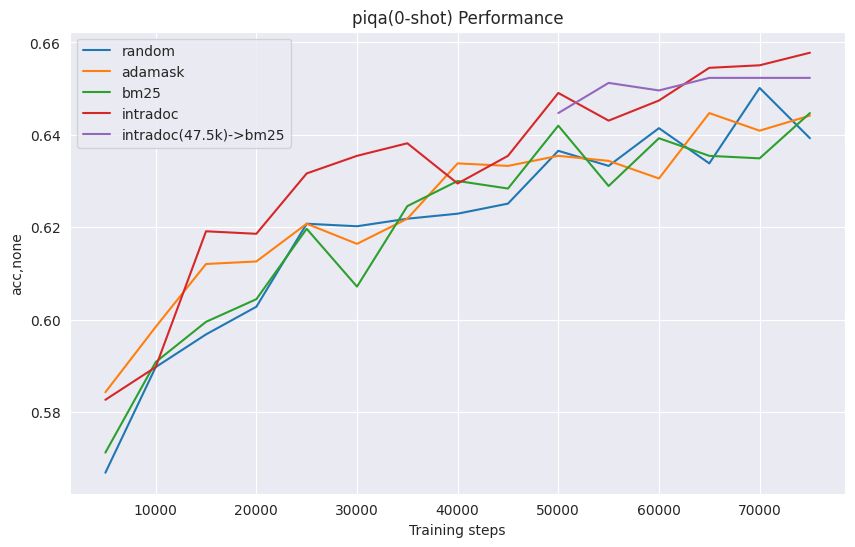

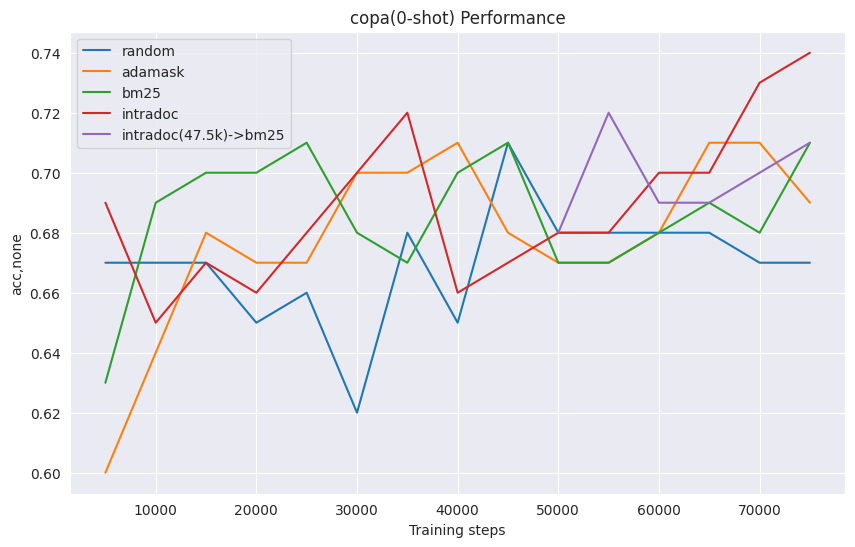

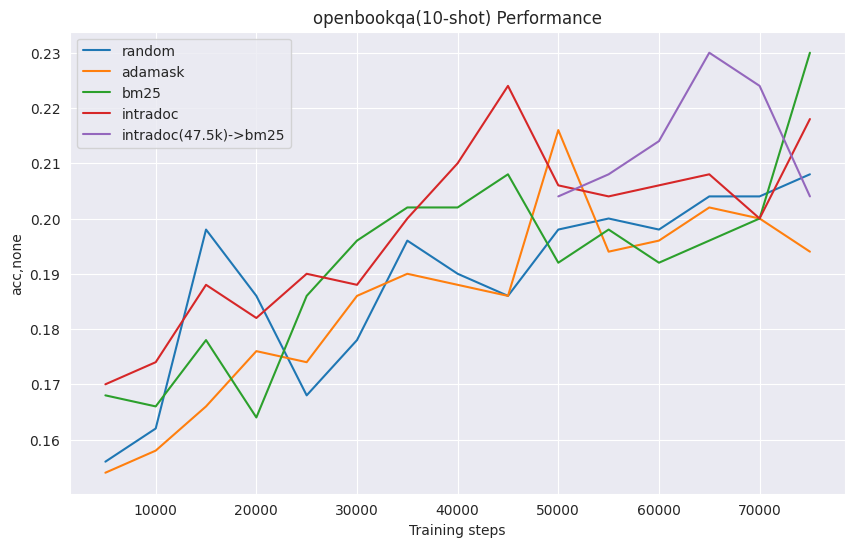

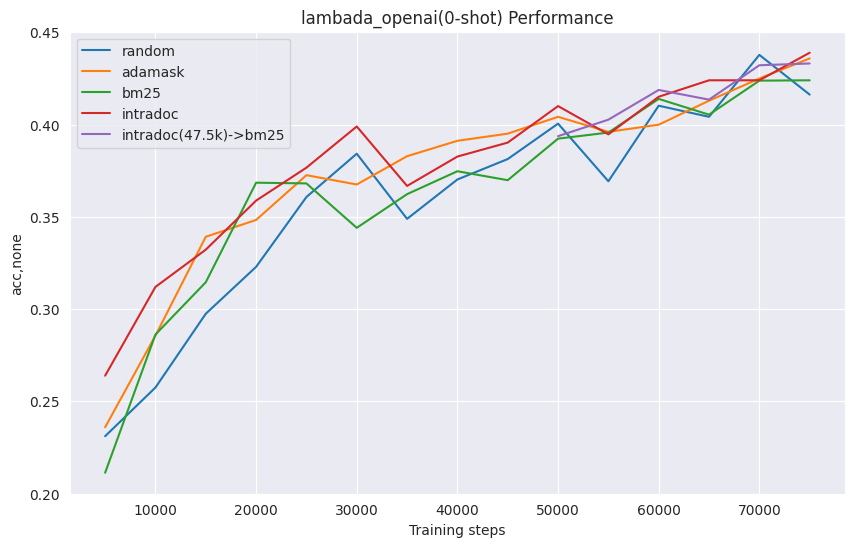

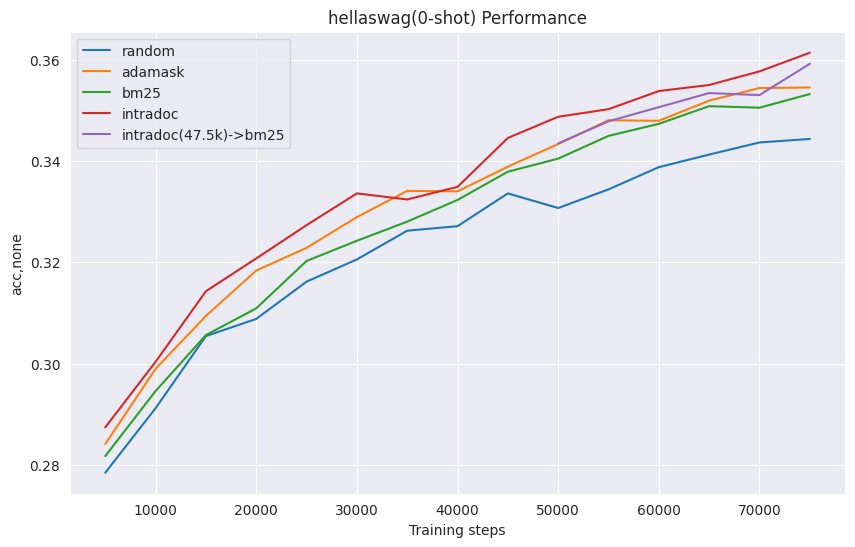

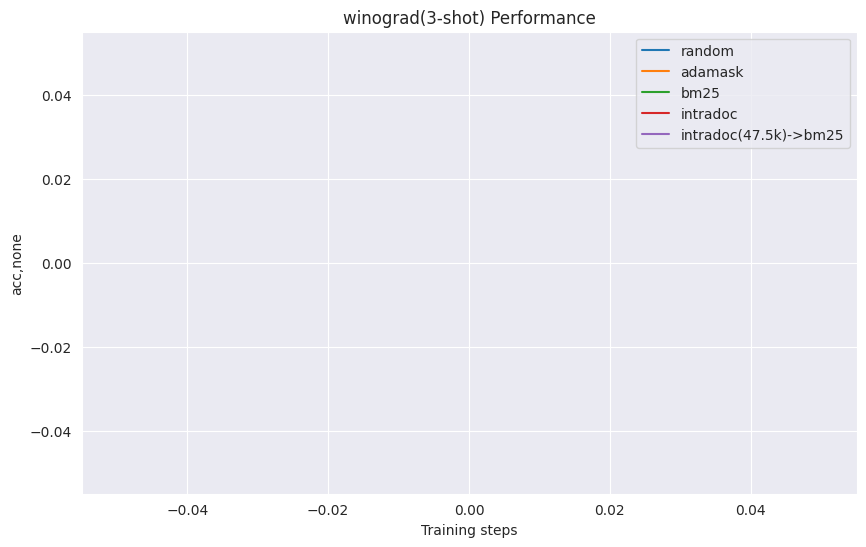

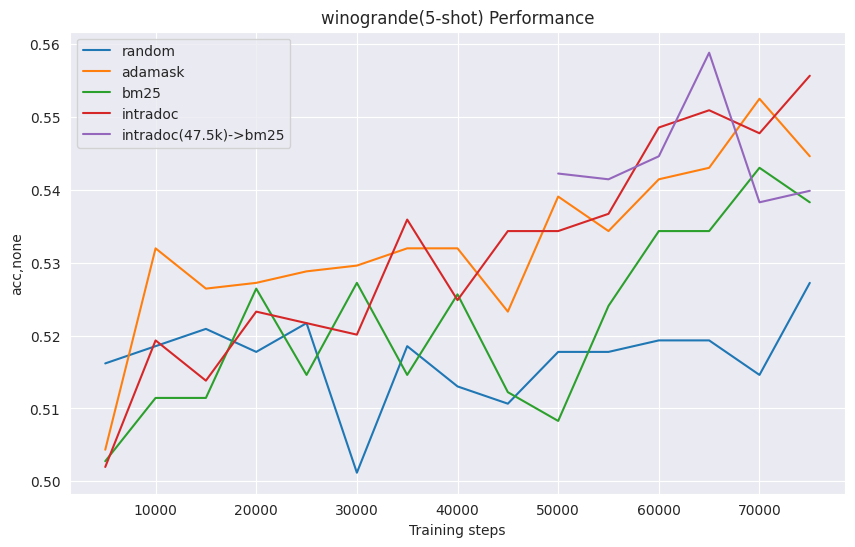

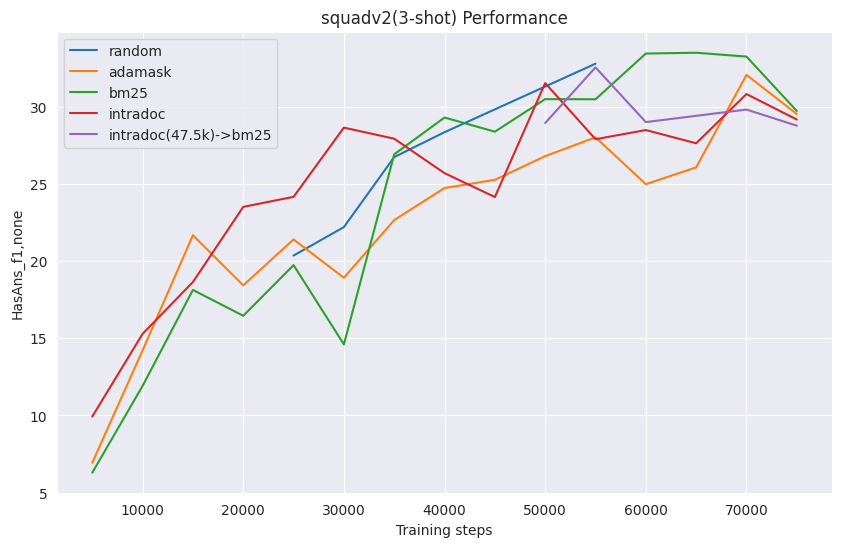

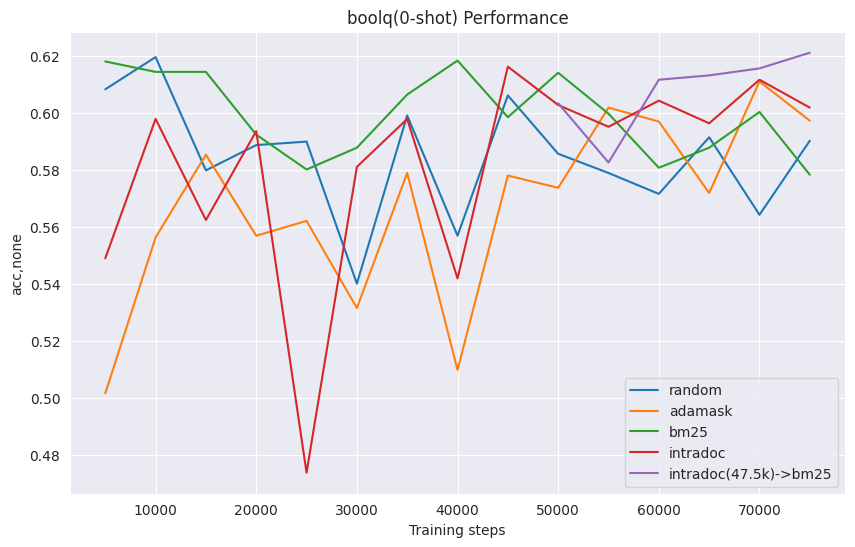

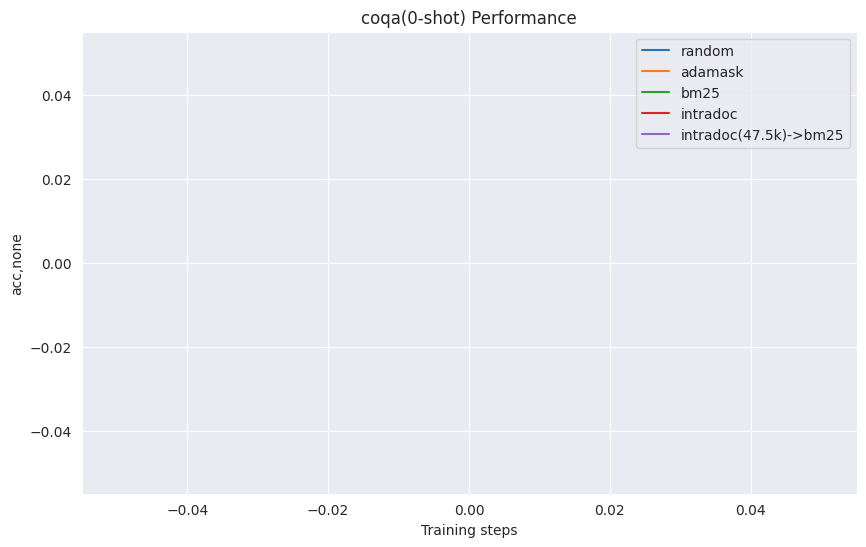

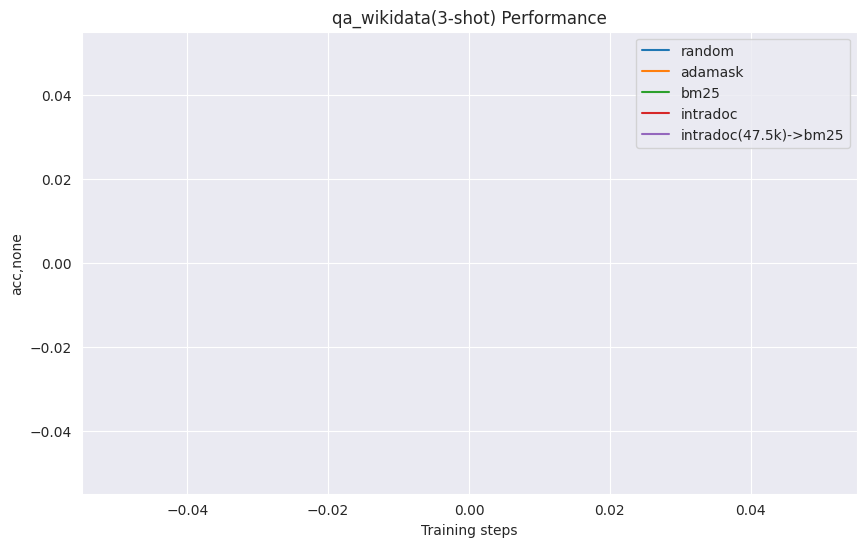

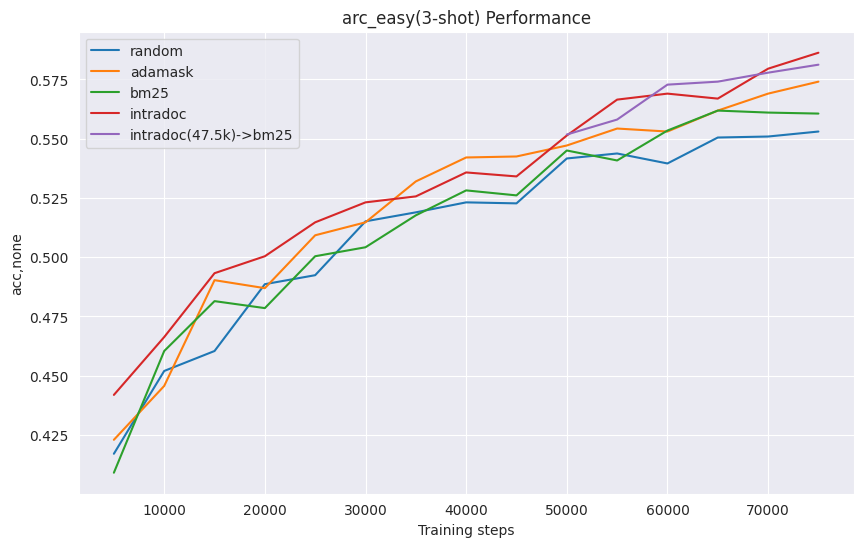

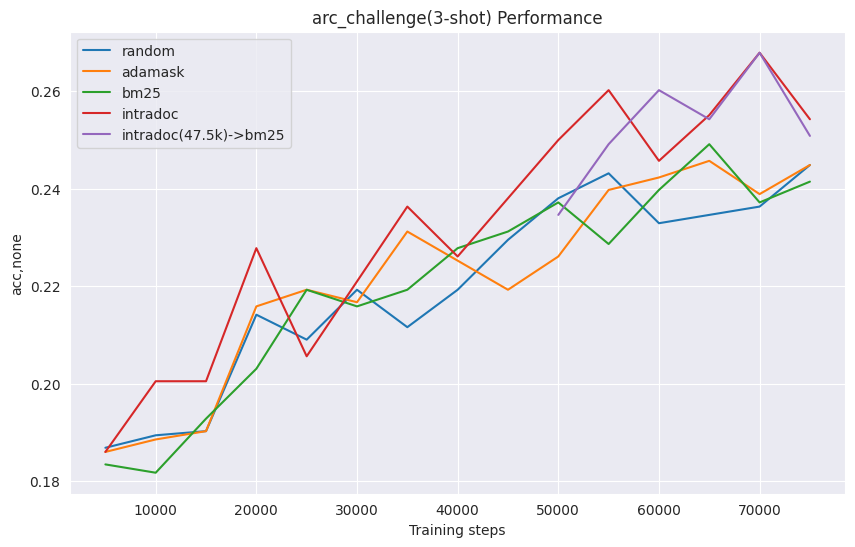

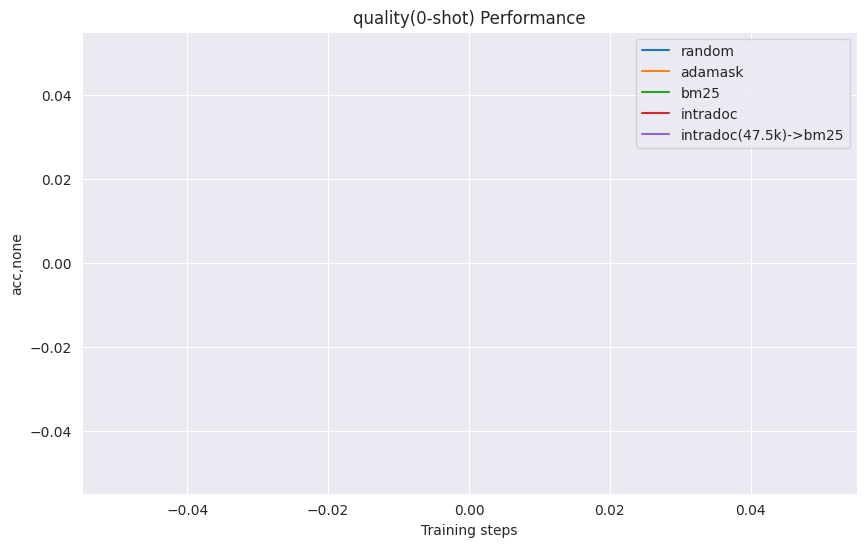

In [51]:
# plot the word perplexity against the step
import matplotlib.pyplot as plt
from collections import defaultdict

task_to_col = defaultdict(lambda : 'acc,none')
task_to_col.update({
    'wikitext': 'word_perplexity,none',
    'lambada_standard': 'acc,none',
    'triviaqa': 'exact_match_stderr,remove_whitespace',
    'nq_open': 'exact_match_stderr,remove_whitespace',
    'hellaswag': 'acc,none',
    'squadv2': 'HasAns_f1,none'
})
versions_to_meaning = {
    'cc_merged_v2_8k': 'bm25',
    'cc_8k': 'random',
    'intramask_cc_8k': 'intradoc',
    'adamask_cc_merged_v2_8k': 'adamask',
    'cc_merged_v2_8k_intracccont': 'intradoc(47.5k)->bm25',
    'cc_merged_v1_8k': 'dense',
}
interested_versions = ['cc_8k', 'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k', 'intramask_cc_8k', 'cc_merged_v2_8k_intracccont']

plt.figure(figsize=(10, 6))
# get one plot for each task
for task_name, nshot in tasks:
    plt.figure(figsize=(10, 6))
    # filter by 'alias'
    task_df = concat_df[concat_df['alias'] == task_name]
    for ds_version in interested_versions :
        df = task_df[task_df.index == ds_version]
        plt.plot(df['step'], df[task_to_col[task_name]], label=versions_to_meaning[ds_version])
    plt.title(f"{task_name}({nshot}-shot) Performance")
    plt.xlabel("Training steps")
    plt.ylabel(task_to_col[task_name])
    plt.legend()
    plt.show()

### Testing the tokenizer

In [ ]:
from transformers import LlamaTokenizer
import json

In [ ]:
# model = LlamaForConditionalGeneration.from_pretrained("tyzhu/tiny_LLaMA_1b_8k_cc_merged_v3_8k")
tokenizer = LlamaTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf", token = json.load(open('/home/aiops/zhuty/hf_token.json')))

In [ ]:
tokenizer.decode([13])

In [ ]:
tokenizer.encode("How am I doing? \n\n "
                 "I am doing well")

In [ ]:
commands = []
# for step in range(17500, 80000+2500, 2500):
for step in range(27500, 67500 + 2500, 2500):
    # commands.append(f" bash convert_to_hf_general.sh /home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360M_8k_cc_merged_v2_8k_intrav2cont  iter-{step*4:06}-ckpt-step-{step}")
    commands.append(f" bash eval.sh  wikitext /home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360M_8k_cc_merged_v2_8k_intrav2cont/iter-{step*4:06}-ckpt-step-{step}_hf 0")

In [ ]:
print(";".join(commands))

In [ ]:
from huggingface_hub import HfApi

# Initialize the API client
api = HfApi()
api_token = json.load(open("/home/aiops/zhuty/hf_token.json"))

# List models with the specified name
models = api.list_models(author="tyzhu", use_auth_token=api_token)
for model in models:
    model_id = model.modelId
    print(f"Making model '{model_id}' private")
    api.update_repo_visibility(repo_id=model_id, private=True, token=api_token)

In [ ]:
from huggingface_hub import HfApi
import json
for step in range(5000, 80000, 5000):
    try:
        HfApi().model_info(f"tyzhu/tiny_LLaMA_1b_8k_cc_8k_iter-{step*8:06}-ckpt-step-{step}_hf", token =json.load(open('/home/aiops/zhuty/hf_token.json')))
    except:
        print(f"tyzhu/tiny_LLaMA_1b_8k_cc_8k_iter-{step*8:06}-ckpt-step-{step}_hf" + " not found")